linear-regression-scratch

In [ ]:
pip install d2l

     |████████████████████████████████| 81kB 3.9MB/s 


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0], '\nlabels:', labels[0])

features: tensor([-0.2077, -0.7815]) 
labels: tensor([6.4350])


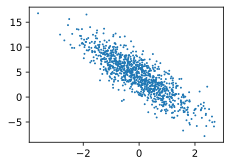

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-0.2077, -0.7815],
        [-0.8404, -0.0214],
        [-0.1504,  0.4928],
        [-2.0309, -1.3169],
        [ 0.7316, -0.6889],
        [ 0.8133,  0.1934],
        [ 1.3423, -0.0423],
        [ 0.2833, -0.0022],
        [ 2.0227, -1.5050],
        [-1.6403,  1.7990]]) 
 tensor([[ 6.4350],
        [ 2.5795],
        [ 2.2232],
        [ 4.6306],
        [ 8.0138],
        [ 5.1718],
        [ 7.0191],
        [ 4.7807],
        [13.3568],
        [-5.1877]])


In [ ]:
w = torch.normal(0, 0.01, size = (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [ ]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [ ]:
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.030189
epoch 2, loss 0.000099
epoch 3, loss 0.000048


In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-5.2214e-05,  1.7858e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0001], grad_fn=<RsubBackward1>)


In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [ ]:
def load_array(data_arrays, batch_size, is_train = True):
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle = is_train)

In [ ]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[ 0.3306,  1.0095],
         [ 0.4656,  1.7782],
         [ 1.3925, -0.2584],
         [-0.7930,  0.7507],
         [-1.1677,  1.6766],
         [-1.2326, -0.4757],
         [ 0.6243,  0.4378],
         [-0.0350,  0.5421],
         [ 1.1413, -1.2225],
         [ 0.0038, -0.1096]]), tensor([[ 1.4351],
         [-0.9124],
         [ 7.8809],
         [ 0.0666],
         [-3.8469],
         [ 3.3480],
         [ 3.9684],
         [ 2.2818],
         [10.6286],
         [ 4.5727]])]

In [ ]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(net(X), y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features), labels)
  print(f'epoch {epoch + 1}, loss {l : f}')

epoch 1, loss  0.000098
epoch 2, loss  0.000097
epoch 3, loss  0.000097


In [ ]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-3.8624e-05, -4.3154e-05])
b的估计误差： tensor([0.0011])
